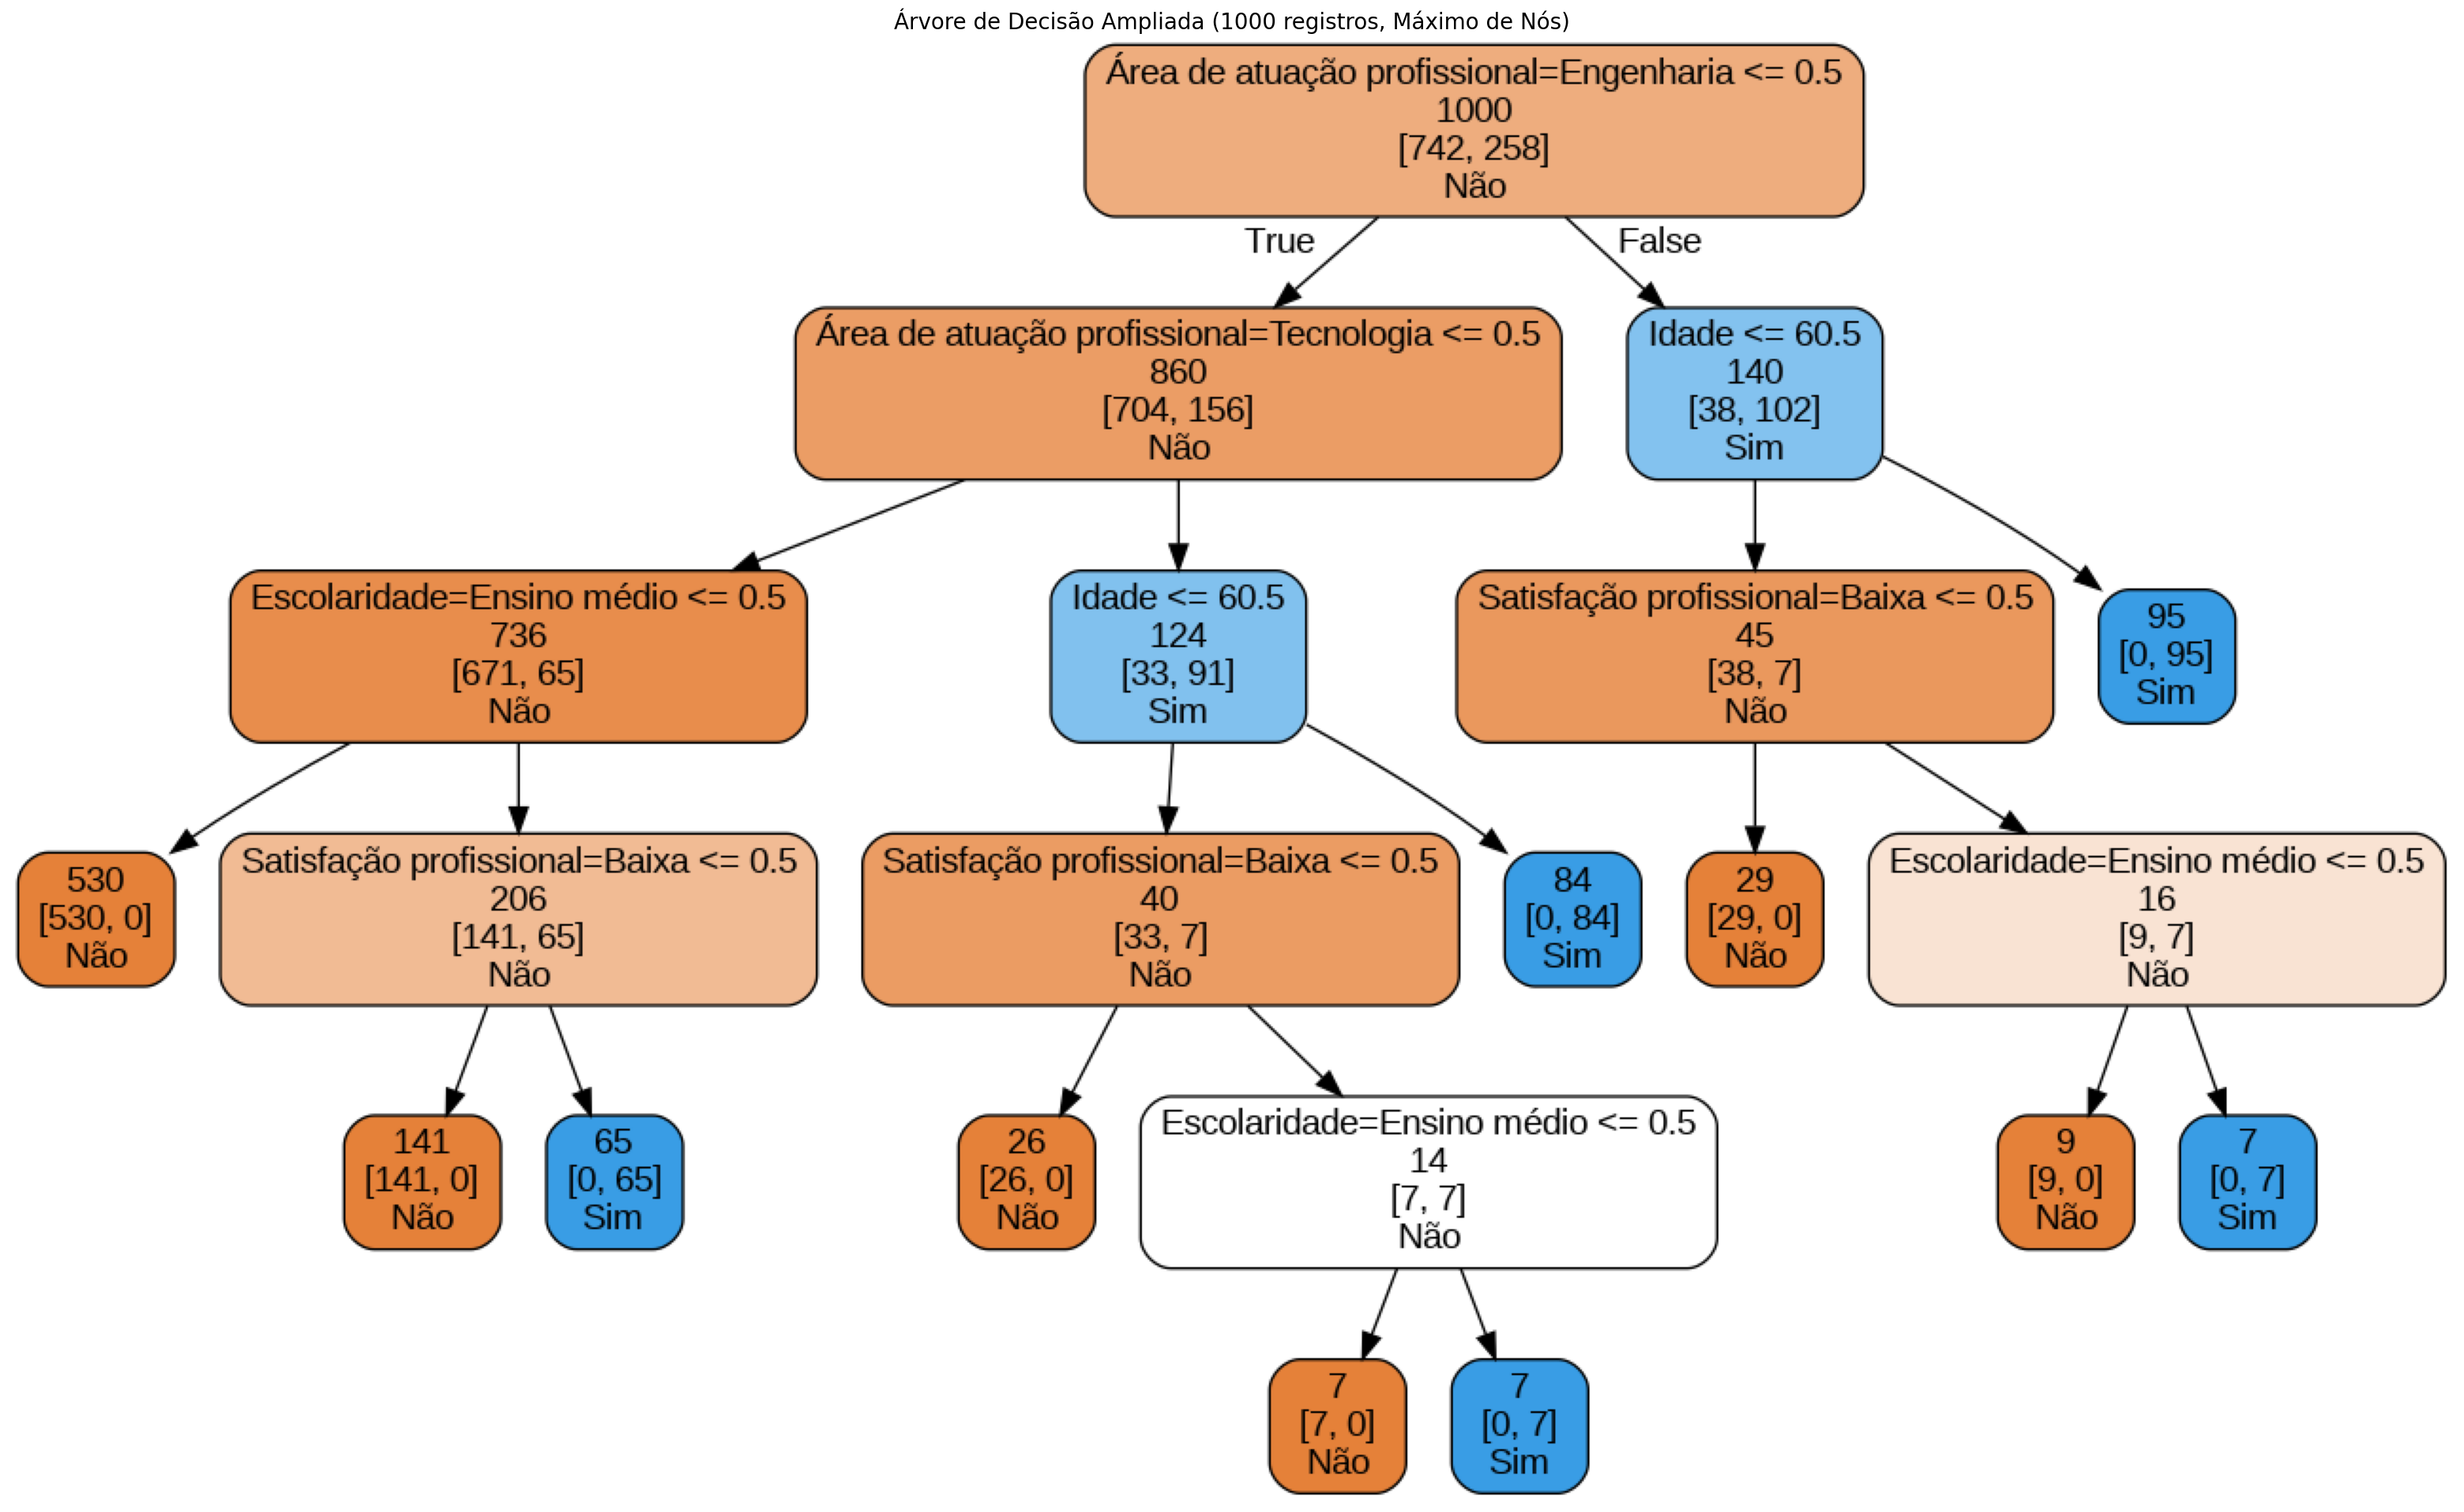

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Função para gerar a variável alvo com base em padrões realistas
def gerar_discriminacao(row):
    if row["Área de atuação profissional"] in ["Tecnologia", "Engenharia"] and row["Idade"] > 60:
        return "Sim"
    if row["Escolaridade"] == "Ensino médio" and row["Satisfação profissional"] == "Baixa":
        return "Sim"
    return "Não"

# Gerar dados simulados com 1000 registros
n = 1000
np.random.seed(42)


data_sim = {
    "Idade": np.random.randint(55, 75, size=n),
    "Gênero": np.random.choice(["Masculino", "Feminino"], size=n),
    "Área de atuação profissional": np.random.choice(["Tecnologia", "Educação", "Saúde", "Administração", "Engenharia", "Comércio", "Serviços", "Jurídico"], size=n),
    "Escolaridade": np.random.choice(["Ensino médio", "Superior completo", "Mestrado", "Doutorado"], size=n, p=[0.3, 0.4, 0.2, 0.1]),
    "Modelo de trabalho": np.random.choice(["Presencial", "Remoto", "Híbrido"], size=n),
    "Satisfação profissional": np.random.choice(["Baixa", "Média", "Alta"], size=n, p=[0.3, 0.4, 0.3]),
    "Adequação às novas tecnologias": np.random.choice(["Baixa", "Média", "Alta"], size=n, p=[0.3, 0.4, 0.3]),
    "Acesso a treinamentos": np.random.choice(["Raro", "Ocasional", "Frequente"], size=n),
    "Flexibilidade no trabalho (55+)": np.random.choice(["Sim", "Não"], size=n),
    "Incentivo à diversidade etária na empresa": np.random.choice(["Sim", "Não"], size=n),
    "Tipo de empresa": np.random.choice(["Privada", "Pública", "Startup", "Autônomo"], size=n),
    "Tamanho da empresa": np.random.choice(["Pequena", "Média", "Grande"], size=n),
    "Vínculo empregatício (classificação IBGE)": np.random.choice(["Com carteira", "Sem carteira", "Conta própria", "Empregador", "Público"], size=n),
    "Formalidade do emprego": np.random.choice(["Formal", "Informal"], size=n),
    "Sentimento de valorização na empresa (55+)": np.random.choice(["Baixo", "Médio", "Alto"], size=n, p=[0.3, 0.4, 0.3]),
    "Acesso a mentorias e suporte": np.random.choice(["Sim", "Não"], size=n),
    "Planos de aposentadoria e transição de carreira": np.random.choice(["Sim", "Não"], size=n)
}

# Criar DataFrame
df = pd.DataFrame(data_sim)
df["Já sofreu discriminação por idade?"] = df.apply(gerar_discriminacao, axis=1)

# Pré-processamento
X_dict = df.drop(columns=["Já sofreu discriminação por idade?"]).T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(df["Já sofreu discriminação por idade?"])

# Treinamento da árvore sem limite de profundidade e com critérios mínimos
model = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
model.fit(X, y)

# Exportação da árvore no formato gráfico simples
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=vect.feature_names_,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    label='none'
)

# Visualização
graph = graphviz.Source(dot_data)
graph.render("arvore_max_nos_simples", format="png", cleanup=True)

# Exibir a imagem da árvore
img = PILImage.open("arvore_max_nos_simples.png")
plt.figure(figsize=(40, 32))
plt.imshow(img)
plt.axis('off')
plt.title("Árvore de Decisão Ampliada (1000 registros, Máximo de Nós)", fontsize=20)
plt.show()